In [1]:
# Basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Model
from pycaret.classification import *

In [63]:
df= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
# Describe the data 

def desc(df):
    print(df.shape)    # Shape of data
    display(df.head()) # Head of data
    display(df.tail()) # Tail
    display(df.info()) # data info
    display(df.describe().T) # Description
    

In [4]:
desc(df)

(39161, 19)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

None

,count,mean,std,min,25%,50%,75%,max
id,39161.0,19581.000000,11304.951283,1.0,9791.0,19581.0,29371.0,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0


In [5]:
# checking null values


df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

0    37163
1     1998
Name: buy, dtype: int64


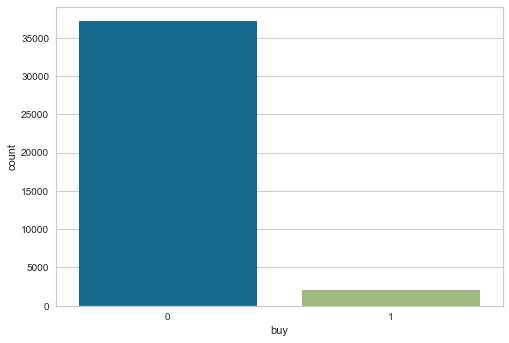

In [6]:
# checking the ditribution of target variable

sns.countplot(data=df, x='buy')
print(df['buy'].value_counts())

In [7]:
# checking the number of unique values in signup_date feature

df['signup_date'].nunique()

1800

In [8]:
# checking the number of unique values in created_at feature


df['created_at'].nunique()

365

In [9]:
# Here will check the value of products_purchased

df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

###  Preprocessing and Modeling

In [10]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [64]:
# Here will handle null values of products_purchased will replace null value with median

# For Train Data

df['products_purchased'].fillna(df['products_purchased'].median(), inplace=True)
df['products_purchased'].value_counts()

2.0    29778
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64

In [65]:
# For Test Data

df_test['products_purchased'].fillna(df_test['products_purchased'].median(), inplace=True)
df_test['products_purchased'].value_counts()

2.0    10620
3.0     1260
1.0     1106
4.0      198
Name: products_purchased, dtype: int64

In [14]:
# For checking different model we will use pycaret library

In [15]:
# We have some features which is not relevant i.e 'id','signup_date','created_at' will drop this features

In [16]:
# At the time of model building will set fix_balance True so it will balanced our data.

model=setup(data=df, target='buy', ignore_features=['id','signup_date','created_at'], fix_imbalance = True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,8248
1,Target,buy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(39161, 19)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
# Here we will try all models which are available in classification

b_mod=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9718,0.9039,0.5572,0.8518,0.6735,0.6594,0.6758,8.9230
lightgbm,Light Gradient Boosting Machine,0.9712,0.9077,0.5732,0.8224,0.6752,0.6607,0.6726,2.7920
et,Extra Trees Classifier,0.9638,0.8292,0.5655,0.6891,0.6204,0.6016,0.6053,9.0950
rf,Random Forest Classifier,0.9626,0.8564,0.5620,0.6723,0.6115,0.5920,0.5951,3.2590
dt,Decision Tree Classifier,0.9595,0.7855,0.5565,0.6298,0.5900,0.5689,0.5705,0.3500
gbc,Gradient Boosting Classifier,0.9580,0.9086,0.6360,0.5932,0.6130,0.5909,0.5917,7.8550
dummy,Dummy Classifier,0.9477,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2960
ada,Ada Boost Classifier,0.9393,0.9040,0.6743,0.4566,0.5415,0.5107,0.5234,1.3310
knn,K Neighbors Classifier,0.9111,0.7484,0.4359,0.2775,0.3387,0.2936,0.3024,20.6370
lr,Logistic Regression,0.8778,0.9147,0.7908,0.2714,0.4040,0.3536,0.4172,2.5730


In [18]:
# Best model among all

b_mod

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8248, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [19]:
# Will predict the output 

pred=predict_model(b_mod, data=df_test)

In [20]:
pred.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Label,Score
0,39162,2022-01-01,2,2,2.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,1,0.9988
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,0,0.9986
2,39164,2022-01-01,8,7,2.0,NaN,0,0,0,0,1,1,0,0,0,0,0,0,0,0.9184
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,1,0.9603
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0.7433


In [21]:
# will create submission file test data

id1=list(df_test['id'])
buy=list(pred['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub6.csv', index=False)


In [24]:
# Light Gradient Boosting Machine

lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9121,0.5972,0.8431,0.6992,0.6855,0.6967
1,0.9701,0.9008,0.5833,0.7925,0.6720,0.6567,0.6652
2,0.9719,0.9141,0.5804,0.8300,0.6831,0.6689,0.6806
3,0.9697,0.9188,0.5664,0.7941,0.6612,0.6458,0.6560
4,0.9679,0.9053,0.5524,0.7670,0.6423,0.6259,0.6352
5,0.9741,0.9105,0.5944,0.8673,0.7054,0.6923,0.7059
6,0.9737,0.8980,0.5944,0.8586,0.7025,0.6892,0.7020
7,0.9679,0.8845,0.5035,0.8090,0.6207,0.6049,0.6235
8,0.9719,0.9228,0.5903,0.8252,0.6883,0.6740,0.6844


In [25]:
pred_l=predict_model(lightgbm, data=df_test)


id1=list(df_test['id'])
buy=list(pred_l['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub7.csv', index=False)

In [26]:
# Will try to hypertune this model

lightgbm_t=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9734,0.9103,0.5903,0.8586,0.6996,0.6862,0.6994
1,0.9716,0.9029,0.5833,0.8235,0.6829,0.6685,0.6794
2,0.9715,0.9109,0.5594,0.8421,0.6723,0.6580,0.6731
3,0.9712,0.9128,0.5594,0.8333,0.6695,0.6550,0.6692
4,0.9675,0.9036,0.5315,0.7755,0.6307,0.6143,0.6264
5,0.9748,0.9034,0.6014,0.8776,0.7137,0.7010,0.7147
6,0.9734,0.8951,0.5734,0.8723,0.6920,0.6787,0.6950
7,0.9679,0.8800,0.4825,0.8313,0.6106,0.5951,0.6192
8,0.9745,0.9220,0.5903,0.8854,0.7083,0.6955,0.7112


In [27]:
pred_lt=predict_model(lightgbm_t, data=df_test)


id1=list(df_test['id'])
buy=list(pred_lt['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub8.csv', index=False)

In [29]:
lightgbm_t2 = tune_model(lightgbm_t, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9734,0.9103,0.5903,0.8586,0.6996,0.6862,0.6994
1,0.9716,0.9029,0.5833,0.8235,0.6829,0.6685,0.6794
2,0.9715,0.9109,0.5594,0.8421,0.6723,0.6580,0.6731
3,0.9712,0.9128,0.5594,0.8333,0.6695,0.6550,0.6692
4,0.9675,0.9036,0.5315,0.7755,0.6307,0.6143,0.6264
5,0.9748,0.9034,0.6014,0.8776,0.7137,0.7010,0.7147
6,0.9734,0.8951,0.5734,0.8723,0.6920,0.6787,0.6950
7,0.9679,0.8800,0.4825,0.8313,0.6106,0.5951,0.6192
8,0.9745,0.9220,0.5903,0.8854,0.7083,0.6955,0.7112


In [30]:
pred_lt2=predict_model(lightgbm_t2, data=df_test)


id1=list(df_test['id'])
buy=list(pred_lt2['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub9.csv', index=False)

In [35]:
lightgbm_t2

LGBMClassifier(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=150, n_jobs=-1, num_leaves=30, objective=None,
               random_state=8248, reg_alpha=0.1, reg_lambda=0.01, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
# will save our model for future use

import pickle

In [37]:
model_name = 'model.sav'
pickle.dump(lightgbm_t2, open(model_name, 'wb'))

In [67]:
from scipy.stats import zscore

In [68]:
df['products_purchased_s']= zscore(df['products_purchased'])

In [69]:
df['campaign_var_1_s']= zscore(df['campaign_var_1'])
df['campaign_var_2_s']= zscore(df['campaign_var_2'])

In [57]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_s,campaign_var_1_s,campaign_var_2_s
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,1,1,0,0,0,0,0,-0.133551,-1.590548,-1.703251
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,1,0,0,0,0,0,0,-0.133551,-1.302604,-2.085768
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,1.725675,0.713003,-1.320734
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,-0.133551,-0.150828,0.209334
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,-0.133551,-0.726716,-0.173183


In [58]:
df_test['products_purchased_s']= zscore(df_test['products_purchased'])
df_test['campaign_var_1_s']= zscore(df_test['campaign_var_1'])
df_test['campaign_var_2_s']= zscore(df_test['campaign_var_2'])

In [61]:
df_test.head()

,id,created_at,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,products_purchased_s,campaign_var_1_s,campaign_var_2_s
0,39162,2022-01-01,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,-0.085549,-1.590191,-2.211315
1,39163,2022-01-01,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,1.965145,-1.034611,-0.351009
2,39164,2022-01-01,NaN,0,0,0,0,1,1,0,0,0,0,0,0,-0.085549,0.076548,-0.351009
3,39165,2022-01-01,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,-0.085549,0.354338,0.021053
4,39166,2022-01-01,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,-0.085549,-1.034611,-1.095131


In [60]:
df.drop(['products_purchased','campaign_var_1','campaign_var_2'], axis=1, inplace=True)
df_test.drop(['products_purchased','campaign_var_1','campaign_var_2'], axis=1, inplace=True)

In [62]:
model_s=setup(data=df, target='buy', ignore_features=['id','signup_date','created_at'], fix_imbalance = True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

b_mod_s=compare_models()

pred_s=predict_model(b_mod_s, data=df_test)

id1=list(df_test['id'])
buy=list(pred_s['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub10.csv', index=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9711,0.8995,0.5299,0.8336,0.6473,0.6330,0.6511,5.8210
lightgbm,Light Gradient Boosting Machine,0.9707,0.9068,0.5467,0.8061,0.6511,0.6364,0.6497,2.4610
nb,Naive Bayes,0.9676,0.9012,0.5306,0.7504,0.6211,0.6047,0.6149,0.1620
rf,Random Forest Classifier,0.9634,0.8520,0.5393,0.6676,0.5962,0.5773,0.5812,4.1340
et,Extra Trees Classifier,0.9631,0.8150,0.5379,0.6622,0.5930,0.5739,0.5776,5.0140
dt,Decision Tree Classifier,0.9598,0.7663,0.5262,0.6159,0.5670,0.5461,0.5482,0.3340
qda,Quadratic Discriminant Analysis,0.9499,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3580
dummy,Dummy Classifier,0.9499,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1150
gbc,Gradient Boosting Classifier,0.9343,0.9082,0.6749,0.4063,0.5069,0.4740,0.4918,5.5310
knn,K Neighbors Classifier,0.9264,0.7946,0.5467,0.3498,0.4264,0.3891,0.4003,7.4940


In [66]:
model_s1=setup(data=df, target='buy', ignore_features=['id','signup_date','created_at'], fix_imbalance = True,
              remove_multicollinearity = True, multicollinearity_threshold = 0.6, remove_outliers = True)

b_mod_s1=compare_models()

pred_s1=predict_model(b_mod_s1, data=df_test)

id1=list(df_test['id'])
buy=list(pred_s1['Label'])

id_series = pd.Series(id1)
buy_series = pd.Series(buy)

frame={'id': id_series, 'buy': buy_series}

sub=pd.DataFrame(frame, index=None)

sub.to_csv('sub11.csv', index=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9758,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1320
xgboost,Extreme Gradient Boosting,0.9677,0.7777,0.0794,0.1567,0.1045,0.0902,0.0959,8.7140
lightgbm,Light Gradient Boosting Machine,0.9656,0.7997,0.1222,0.1801,0.1444,0.1277,0.1307,2.3090
et,Extra Trees Classifier,0.9644,0.6424,0.0841,0.1269,0.1006,0.0835,0.0855,6.8490
rf,Random Forest Classifier,0.9641,0.6993,0.0635,0.1015,0.0777,0.0606,0.0624,4.2640
dt,Decision Tree Classifier,0.9610,0.5727,0.0841,0.1067,0.0937,0.0741,0.0748,0.3720
gbc,Gradient Boosting Classifier,0.9210,0.8042,0.4206,0.1360,0.2051,0.1750,0.2066,6.4100
knn,K Neighbors Classifier,0.9202,0.6461,0.2317,0.0843,0.1235,0.0913,0.1043,19.2120
ada,Ada Boost Classifier,0.8674,0.8051,0.5476,0.0987,0.1671,0.1315,0.1907,1.8410
svm,SVM - Linear Kernel,0.7850,0.0000,0.7095,0.0763,0.1378,0.0984,0.1827,0.4610
